<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/GAM_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygam
!pip install pytimetk

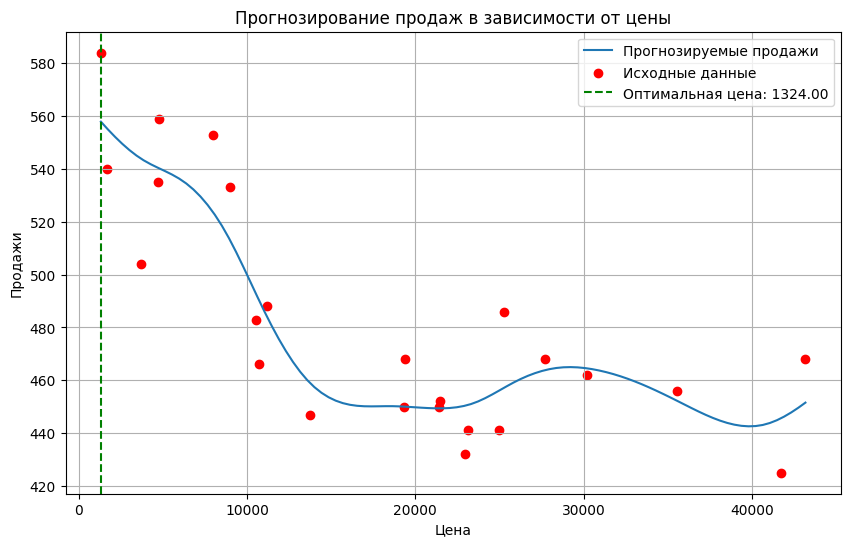

(1324.0, 557.8988835091549)

In [ ]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Обучение модели
gam = LinearGAM(s(0)).fit(prices, sales)

# Прогнозирование на следующем месяце для различных цен
price_range = np.linspace(min(prices), max(prices), 100)
sales_pred = gam.predict(price_range)

# Поиск цены, при которой продажи максимальны
optimal_price = price_range[np.argmax(sales_pred)]
optimal_sales = max(sales_pred)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(price_range, sales_pred, label='Прогнозируемые продажи')
plt.scatter(prices, sales, color='red', label='Исходные данные')
plt.axvline(optimal_price, color='green', linestyle='--', label=f'Оптимальная цена: {optimal_price:.2f}')
plt.xlabel('Цена')
plt.ylabel('Продажи')
plt.title('Прогнозирование продаж в зависимости от цены')
plt.legend()
plt.grid(True)
plt.show()

# Вывод оптимальной цены и объема продаж
optimal_price, optimal_sales


In [ ]:
# Данные
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d

# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])

# # Исходные данные
# prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
# sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# # Создаем интерполяционные функции
# f_prices = interp1d(np.linspace(0, 1, len(prices)), prices, kind='cubic')
# f_sales = interp1d(np.linspace(0, 1, len(sales)), sales, kind='cubic')

# # Генерируем 1000 значений
# x_new = np.linspace(0, 1, 1000)
# prices_new = f_prices(x_new)
# sales_new = f_sales(x_new)

# X = pd.DataFrame({'Price':prices})
# y = pd.DataFrame({'Sales':sales})

# ________________________________
# Создаем значения X, которые распределены по нормальному закону
# prices = np.random.normal(50, 10, 100)

# # Генерация зависимой переменной y как логарифмическая функция от X с добавлением шума
# sales = np.log(prices) * 1000 + np.random.normal(0, 50, 100)

# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# # Построение графика
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Price'], y['Sales'], alpha=0.5)
# plt.xlabel('Price')
# plt.ylabel('Sales')
# plt.title('Данные, распределенные по логарифмической функции')
# plt.grid(True)
# plt.show()
# print(X.shape)
#______________________________
# Генерация данных
# np.random.seed(42)
# prices = np.random.normal(50, 10, 50)

# # Инвертированная зависимость: чем выше цена, тем ниже продажи, с ещё большей дисперсией
# sales = (10000 / prices) ** 2 + np.random.normal(0, 10000, 50)  # Увеличил разброс шума

# # Создание DataFrame
# X = pd.DataFrame({'Price': prices})
# y = pd.DataFrame({'Sales': sales})

# # Построение графика
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Price'], y['Sales'], alpha=0.5, color='blue')
# plt.xlabel('Price')
# plt.ylabel('Sales')
# plt.title('Данные с убывающей зависимостью продаж от цены и увеличенной дисперсией')
# plt.grid(True)
# plt.show()
#_______________
# Путь к вашему Excel файлу
file_path = '/content/ALL_res_Sales_vol_price_Kod_TT.xlsx'


# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_kod_TT = pd.read_excel(file_path, engine='openpyxl')
# df_kod_TT = df_kod_TT[df_kod_TT['PRICE PER UNIT'] >= 400]
items = [
    "7224",
    "5207",
    "5257",
    "D084",
    "3874",
    "5184",
    "J502",
    "5216",
    "6910",
    "5194"
]
# df_kod_TT = df_kod_TT[(df_kod_TT['Kod_TT'] == '7224') | (df_kod_TT['Kod_TT'] == '5207')]
# print(df_kod_TT)
df_kod_TT = df_kod_TT[df_kod_TT['Kod_TT'].isin(items)]



X = pd.DataFrame({'Price': df_kod_TT['PRICE PER UNIT'].tolist()})
y = pd.DataFrame({'Sales': df_kod_TT['SALES VOL'].tolist()})

# X = X[X['Price'] >= 400]
# y = y[y['Sales'] >= 15]



In [ ]:
quantiles = [0.25,0.5,0.975]
gam_res = {}
for q in quantiles:
  gam  = ExpectileGAM(s(0),expectile=q)
  gam.fit(X,y)
  gam_res[q]=gam
gam_res


{0.25: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.25, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

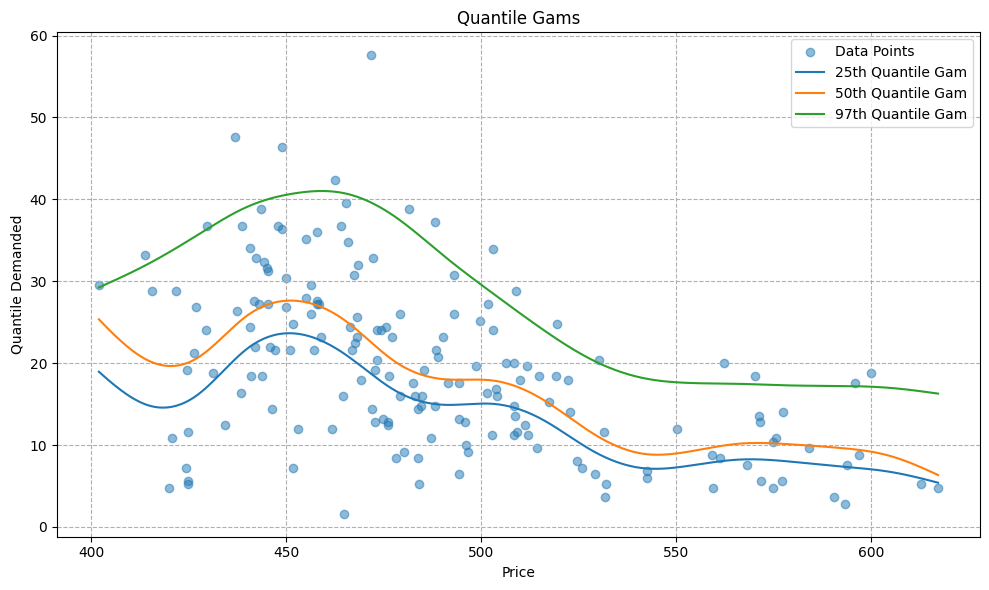

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.5,label='Data Points')
XX = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
for q,gam in gam_res.items():
   plt.plot(XX,gam.predict(XX),label=f'{int(q*100)}th Quantile Gam')

plt.xlabel('Price')
plt.ylabel('Quantile Demanded')
plt.title('Quantile Gams')
plt.grid(True,which='both',linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
gam_res

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Исходные данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Создаем DataFrame
X = pd.DataFrame({'Price': prices})
y = pd.DataFrame({'Sales': sales})

# Добавляем константу для свободного члена
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)

# Обучаем модель
results = model.fit()

# Выводим результаты
print(results.summary())

# Предсказываем значения
y_pred = results.predict(X)

# Строим график
plt.scatter(X['Price'], y, label='Data')
plt.plot(X['Price'], y_pred, color='red', label='Regression line')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from pygam import s,ExpectileGAM
from scipy.interpolate import interp1d
import plotly.express as px
import pytimetk as tk
import textwrap
import numpy as np


# Исходные данные
prices = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994, 21457, 23159, 19329, 24965, 35538, 30202, 27719, 19388, 9006, 41747, 25271, 43175])
sales = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553, 452, 441, 450, 441, 456, 462, 468, 468, 533, 425, 486, 468])
# Создаем DataFrame
data = pd.DataFrame({'Price': prices, 'Sales': sales})

# Создаем scatter plot с линией LOWESS
fig = px.scatter(data, x='Price', y='Sales', trendline='lowess')

# Показываем график
fig.show()

In [ ]:
all_gam_results = pd.DataFrame()
quantiles

In [ ]:
# Путь к вашему Excel файлу
file_path = '/content/ALL_res_Sales_vol_price_Kod_TT.xlsx'

# Чтение данных из Excel файла
# Если файл содержит несколько листов, вы можете указать название или индекс листа с помощью параметра sheet_name
df_kod_TT = pd.read_excel(file_path, engine='openpyxl')

